In [ ]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
import yfinance as yf
from datetime import datetime, timedelta

In [ ]:
ticker = "AAPL"
start_date = '2020-1-1'

In [ ]:
def import_stock_data(ticker, start='2010-1-1'):
    data = pd.DataFrame()


    stock = yf.Ticker(ticker)
    data = stock.history(start=start)

    return data

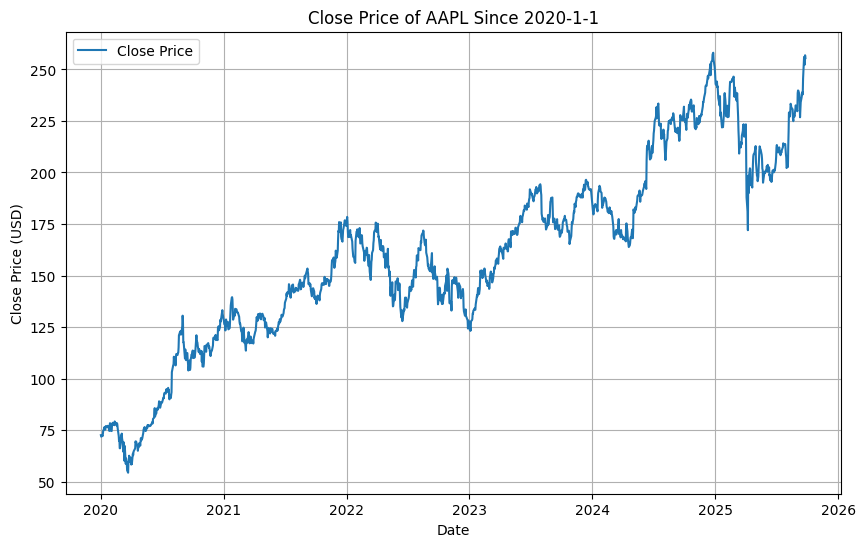

In [ ]:
data = import_stock_data(ticker, start = start_date)


plt.figure(figsize=(10, 6))
plt.plot(data['Close'], label='Close Price')
plt.title(f'Close Price of {ticker} Since {start_date}')
plt.xlabel('Date')
plt.ylabel('Close Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
def volatility_calc(lr):
    daily_volatility = np.std(lr)
    return daily_volatility

*Running Simulations*

In [ ]:
num_simulations = 100000
num_days = 100

#closing price for the last day of the stock data
last_price = data['Close'].iloc[-1]

In [ ]:
def run_monteCarlo(num_simulations, num_days, last_price, log_return):

    daily_vol = volatility_calc(log_return)


    all_simulations = []

    for x in range(num_simulations):
        price_series = [last_price]

        for y in range(1, num_days):
            price = price_series[-1] * (1 + np.random.normal(0, daily_vol))
            price_series.append(price)

        all_simulations.append(price_series)


    simulation_df = pd.DataFrame(all_simulations).transpose()

    return simulation_df

In [ ]:
def log_returns(stock_data):


    log_returns = np.log(1 + stock_data['Close'].pct_change())
    log_returns = log_returns[1:]

    return log_returns

In [ ]:
log_return = log_returns(data)
simulation_df = run_monteCarlo(num_simulations , num_days , last_price , log_return)

simulation_df.head()

,0,1,2,3,4,5,6,7,8,9,...,99990,99991,99992,99993,99994,99995,99996,99997,99998,99999
0,255.460007,255.460007,255.460007,255.460007,255.460007,255.460007,255.460007,255.460007,255.460007,255.460007,...,255.460007,255.460007,255.460007,255.460007,255.460007,255.460007,255.460007,255.460007,255.460007,255.460007
1,261.050734,254.157111,257.272147,253.657783,251.341788,258.547783,250.680525,260.412530,249.433652,249.951878,...,257.692459,250.607579,252.593888,255.085973,254.980865,252.943361,256.666928,257.994213,248.538782,255.371499
2,260.057165,248.870454,260.034730,254.575987,258.594073,260.415578,243.206039,260.888690,253.097532,253.366385,...,259.552507,249.315559,251.745644,254.708471,256.895214,254.446627,251.571414,257.924620,250.416855,257.205802
3,257.438585,248.381462,257.977995,264.366892,264.846627,255.789078,243.871078,265.763515,254.876459,259.557992,...,262.108057,248.731526,254.267724,250.363254,256.940632,252.178257,247.929503,256.464793,247.572973,251.708950
4,258.114841,260.167050,245.084397,255.425716,269.838043,254.321139,246.630167,261.380870,249.682948,264.099372,...,273.429990,252.200317,245.247929,255.628437,259.957640,252.831559,250.963933,257.663436,253.865995,249.484399


*plotting monte carlo*

Text(0, 0.5, 'Price')

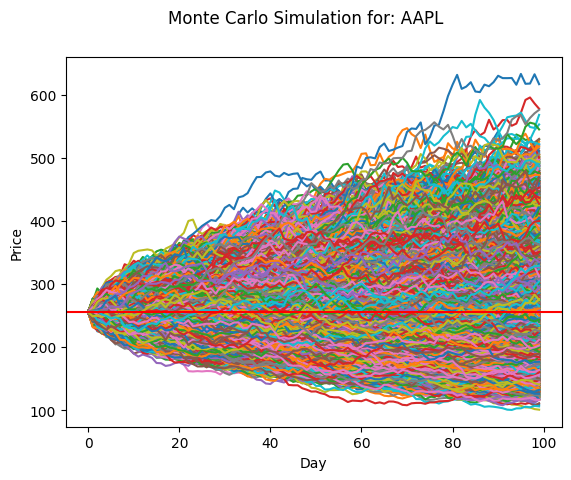

In [ ]:
simulation_df.plot(legend=False)
plt.suptitle(f'Monte Carlo Simulation for: {ticker}')
plt.axhline(y = last_price, color = 'r', linestyle= '-')
plt.xlabel('Day')
plt.ylabel('Price')

*live testing*

today's date is 28th september, predicting for 29th

In [ ]:
day_2_prices = simulation_df.iloc[-1]  # Last row since num_days = 2

# 95% confidence interval
lower_bound = np.percentile(day_2_prices, 2.5)
upper_bound = np.percentile(day_2_prices, 97.5)

#  mean (expected) price
mean_price = np.mean(day_2_prices)


print(f"The expected price for 2 days later is: {mean_price}")
print(f"The 95% confidence interval for the price 2 days later is: ({lower_bound}, {upper_bound})")

The expected price for 2 days later is: 255.4198106657594
The 95% confidence interval for the price 2 days later is: (168.2141096525385, 372.33242566956307)


In [ ]:
# 98% confidence interval
lower_bound = np.percentile(day_2_prices, 1)
upper_bound = np.percentile(day_2_prices, 99)

#  mean (expected) price
mean_price = np.mean(day_2_prices)


print(f"The expected price for 2 days later is: {mean_price}")
print(f"The 98% confidence interval for the price 2 days later is: ({lower_bound}, {upper_bound})")

The expected price for 2 days later is: 255.4198106657594
The 98% confidence interval for the price 2 days later is: (156.09461178328294, 400.803452244773)
